# LOAN PREDICTION DATASET

Among all industries, the insurance domain has one of the largest uses of analytics & data science methods. This dataset provides you a taste of working on data sets from insurance companies – what challenges are faced there, what strategies are used, which variables influence the outcome, etc. This is a classification problem. The data has 615 rows and 13 columns.



## Required libraries

In [1]:
#Import required libraries for data analysis and wrangling

import pandas as pd
import numpy as np
import random as rnd 

# Impord required libraries for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import required ML libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## read the datasets

In [2]:
train_data = pd.read_csv("G:/DataSets/AnalyticsVidhya/Loan Prediction/train_data.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_data = pd.read_csv("G:/DataSets/AnalyticsVidhya/Loan Prediction/test_data.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_data.shape

(614, 13)

In [5]:
test_data.shape

(367, 12)

### Combine whole data for future processing

In [6]:
combine = [train_data,test_data]

In [7]:
train_data.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [8]:
test_data.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'], dtype=object)

In [9]:

train_data.info()

print("*"*100)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married 

### FIND FEATURE COLUMNS

#### First convert categorial feature to numeric and drop unwanted columns

In [10]:
freq_occur_gender = train_data.Gender.mode()[0]
freq_occur_gender

'Male'

#### Replcae Nan value to frequently occoured value of Gender

In [11]:
for dataset in combine:
    dataset['Gender'] = dataset['Gender'].fillna(freq_occur_gender)

In [12]:
for dataset in combine:
    dataset['Gender']= dataset['Gender'].map({'Female':1,'Male':0}).astype(int)

In [13]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,0,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,0,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,0,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Replcae Nan value to frequently occoured value of Marrital Status

In [15]:
freq_occur_marrital_status = train_data.Married.mode()[0]
freq_occur_marrital_status

'Yes'

In [16]:
for dataset in combine:
    dataset['Married'] = dataset['Married'].fillna(freq_occur_marrital_status)
    
# Replcae categorical value to numeric value

for dataset in combine:
    dataset['Married']=dataset['Married'].map({'Yes':1,'No':0}).astype(int)

In [17]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,1,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,0,1,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,0,1,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,0,0,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Replcae Nan value to frequently occoured value of Education Status

In [19]:
freq_occur_education_status = train_data.Education.mode()[0]
freq_occur_education_status

'Graduate'

In [20]:
for dataset in combine:
    dataset['Education'] = dataset['Education'].fillna(freq_occur_education_status)
    
# Replcae categorical value to numeric value

for dataset in combine:
    dataset['Education']=dataset['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)

In [21]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,1,1,1,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,0,1,2,1,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,0,1,2,1,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,0,0,0,0,No,3276,0,78.0,360.0,1.0,Urban


#### Replcae Nan value to frequently occoured value of Employment Status

In [23]:
freq_occur_Employment_status = train_data.Self_Employed.mode()[0]
freq_occur_Employment_status

'No'

In [24]:
for dataset in combine:
    dataset['Self_Employed'] = dataset['Self_Employed'].fillna(freq_occur_Employment_status)
    
# Replcae categorical value to numeric value

for dataset in combine:
    dataset['Self_Employed']=dataset['Self_Employed'].map({'Yes':1,'No':0}).astype(int)

In [25]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,Urban


In [27]:
ApplicantIncome_mean = train_data['ApplicantIncome'].mean()
ApplicantIncome_mean

5403.459283387622

In [28]:
for dataset in combine:
    dataset['ApplicantIncome']=dataset['ApplicantIncome'].fillna(ApplicantIncome_mean)

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           599 non-null object
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int32(4), int64(1), object(4)
memory usage: 52.8+ KB


#### Replcae Nan value to frequently occoured value of Dependency Status

In [30]:
freq_occur_dependency_status = train_data['Dependents'].mode()[0]
freq_occur_dependency_status

'0'

In [31]:
train_data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [32]:
for dataset in combine:
    dataset['Dependents'] = dataset['Dependents'].fillna(freq_occur_dependency_status)

In [33]:
train_data.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [34]:
for dataset in combine:
    dataset['Dependents'] = dataset['Dependents'].map({'0':0,'1':1,'2':2,'3+':3}).astype(int)

In [35]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
train_data.Dependents.unique()

array([0, 1, 2, 3], dtype=int64)

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int32(5), int64(1), object(3)
memory usage: 50.4+ KB


#### Replcae Nan value to mean value of CoapplicantIncome

In [38]:
CoapplicantIncome_mean = train_data.CoapplicantIncome.mean()
CoapplicantIncome_mean

1621.245798027101

In [39]:
for dataset in combine:
    dataset['CoapplicantIncome']=dataset['CoapplicantIncome'].fillna(CoapplicantIncome_mean)

In [40]:
for dataset in combine:
    dataset['CoapplicantIncome'] = dataset['CoapplicantIncome'].astype(int)

In [41]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0,141.0,360.0,1.0,Urban,Y


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int32
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int32(6), int64(1), object(3)
memory usage: 48.0+ KB


#### Replcae Nan value to mean value of LoanAmount

In [43]:
LoanAmount_mean = train_data.LoanAmount.mean()
LoanAmount_mean

146.41216216216216

In [44]:
for dataset in combine:
    dataset['LoanAmount'] = dataset['LoanAmount'].fillna(LoanAmount_mean)

In [45]:
for dataset in combine:
    dataset['LoanAmount'] = dataset['LoanAmount'].astype(int)

In [46]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0,146,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508,128,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0,66,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358,120,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0,141,360.0,1.0,Urban,Y


#### Replcae categorial fetaure into numerical value which name is :"Loan_amount_term"

In [47]:
train_data.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [48]:
freq_occur_loan_amount_term = train_data.Loan_Amount_Term.mode()[0]
freq_occur_loan_amount_term

360.0

In [49]:
for dataset in combine:
    dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(freq_occur_loan_amount_term)

In [50]:
for dataset in combine:
    dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].astype(int)

In [51]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0,146,360,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508,128,360,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0,66,360,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358,120,360,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0,141,360,1.0,Urban,Y


#### Replcae categorial fetaure into numerical value which name is :"credit_history"

In [52]:
train_data.Credit_History.unique()

array([ 1.,  0., nan])

In [53]:
freq_occur_credit_history = train_data.Credit_History.mode()[0]
freq_occur_credit_history

1.0

In [54]:
for dataset in combine:
    dataset['Credit_History'] = dataset['Credit_History'].fillna(freq_occur_credit_history)

In [55]:
for dataset in combine:
    dataset['Credit_History'] = dataset['Credit_History'].astype(int)

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int32
LoanAmount           614 non-null int32
Loan_Amount_Term     614 non-null int32
Credit_History       614 non-null int32
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: int32(9), int64(1), object(3)
memory usage: 40.9+ KB


#### Replcae categorial fetaure into numerical value which name is :"Property_area"

In [57]:
train_data.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [58]:
freq_occoured_property_area = train_data.Property_Area.mode()[0]
freq_occoured_property_area

'Semiurban'

In [59]:
for dataset in combine:
    dataset['Property_Area'] = dataset['Property_Area'].fillna(freq_occoured_property_area)

In [60]:
for dataset in combine:
    dataset['Property_Area'] =  dataset['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':3}).astype(int)

In [61]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0,146,360,1,0,Y
1,LP001003,0,1,1,1,0,4583,1508,128,360,1,1,N
2,LP001005,0,1,0,1,1,3000,0,66,360,1,0,Y
3,LP001006,0,1,0,0,0,2583,2358,120,360,1,0,Y
4,LP001008,0,0,0,1,0,6000,0,141,360,1,0,Y


In [62]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,0,5720,0,110,360,1,0
1,LP001022,0,1,1,1,0,3076,1500,126,360,1,0
2,LP001031,0,1,2,1,0,5000,1800,208,360,1,0
3,LP001035,0,1,2,1,0,2340,2546,100,360,1,0
4,LP001051,0,0,0,0,0,3276,0,78,360,1,0


In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int32
LoanAmount           614 non-null int32
Loan_Amount_Term     614 non-null int32
Credit_History       614 non-null int32
Property_Area        614 non-null int32
Loan_Status          614 non-null object
dtypes: int32(10), int64(1), object(2)
memory usage: 38.5+ KB


In [64]:
train_data.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

### Encode the label term

In [65]:
encode = LabelEncoder()

In [66]:
train_data.Loan_Status = encode.fit_transform(train_data.Loan_Status)

In [67]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0,146,360,1,0,1
1,LP001003,0,1,1,1,0,4583,1508,128,360,1,1,0
2,LP001005,0,1,0,1,1,3000,0,66,360,1,0,1
3,LP001006,0,1,0,0,0,2583,2358,120,360,1,0,1
4,LP001008,0,0,0,1,0,6000,0,141,360,1,0,1


In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int32
LoanAmount           614 non-null int32
Loan_Amount_Term     614 non-null int32
Credit_History       614 non-null int32
Property_Area        614 non-null int32
Loan_Status          614 non-null int64
dtypes: int32(10), int64(2), object(1)
memory usage: 38.5+ KB


## Select Feature using Data Visualization

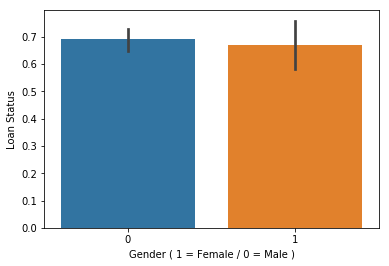

In [69]:
ax = sns.barplot(x="Gender", y="Loan_Status", data=train_data)
ax.set(xlabel='Gender ( 1 = Female / 0 = Male )', ylabel='Loan Status')
plt.show()

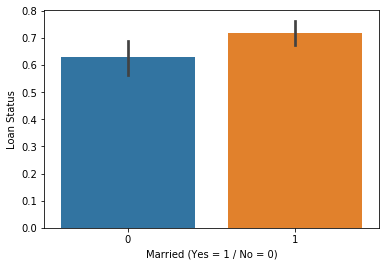

In [70]:
ax = sns.barplot(x="Married", y="Loan_Status", data=train_data)
ax.set(xlabel='Married (Yes = 1 / No = 0)', ylabel='Loan Status')
plt.show()

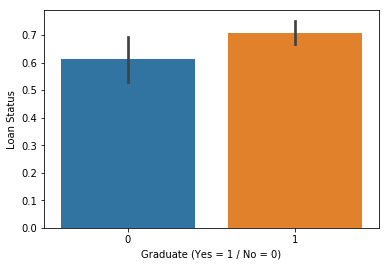

In [71]:
ax = sns.barplot(x="Education", y="Loan_Status", data=train_data)
ax.set(xlabel='Graduate (Yes = 1 / No = 0)', ylabel='Loan Status')
plt.show()

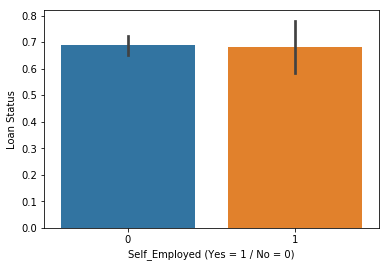

In [72]:
ax = sns.barplot(x="Self_Employed", y="Loan_Status", data=train_data)
ax.set(xlabel='Self_Employed (Yes = 1 / No = 0)', ylabel='Loan Status')
plt.show()

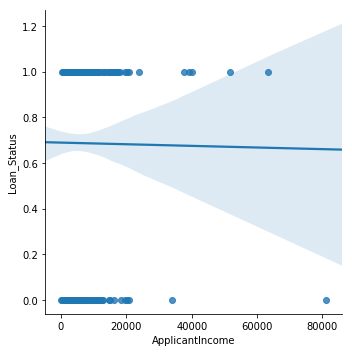

In [73]:
ax = sns.lmplot(x="ApplicantIncome", y="Loan_Status", data=train_data)
plt.show()

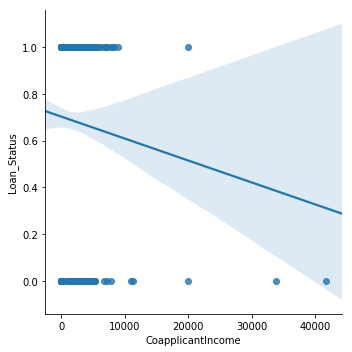

In [74]:
ax = sns.lmplot(x="CoapplicantIncome", y="Loan_Status", data=train_data)
plt.show()

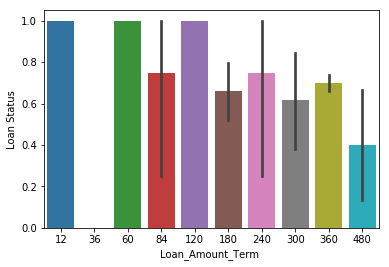

In [75]:
ax = sns.barplot(x="Loan_Amount_Term", y="Loan_Status", data=train_data)
ax.set(xlabel='Loan_Amount_Term ', ylabel='Loan Status')
plt.show()


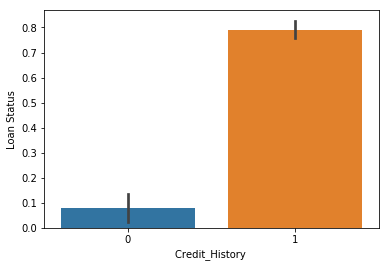

In [76]:
ax = sns.barplot(x="Credit_History", y="Loan_Status", data=train_data)
ax.set(xlabel='Credit_History ', ylabel='Loan Status')
plt.show()

ax = sns.barplot(x="Property_Area", y="Loan_Status", data=train_data)
ax.set(xlabel='Property_Area ', ylabel='Loan Status')
plt.show()

### Remove unwanted columns and diffrentiate Label and feature

In [77]:
train_data.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [78]:
test_data.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'], dtype=object)

In [79]:
X_train = train_data.drop(['Loan_ID','Loan_Status'],axis=1)
Y_train = train_data.Loan_Status

In [80]:
X_test = test_data.drop('Loan_ID',axis=1)

In [81]:
X_train.info()

print("*"*100)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int32
LoanAmount           614 non-null int32
Loan_Amount_Term     614 non-null int32
Credit_History       614 non-null int32
Property_Area        614 non-null int32
dtypes: int32(10), int64(1)
memory usage: 28.9 KB
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               367 non-null int32
Married              367 non-null int32
Dependents           367 non-null int32
Education            367 non-null int32
Self_Employed        367 non-null int32

## MODAL CREATION AND PREDICTION TIME

We will use differnt model and at the end compare prediction accuracy¶

## 1.Logistic Regression

In [82]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_train)

In [83]:
acc_log = accuracy_score(Y_pred,Y_train)*100
acc_log

81.27035830618892

## 2. Support Vector Machines

In [84]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_train)

In [85]:
acc_svc = accuracy_score(Y_pred,Y_train)*100
acc_svc

100.0

## 3. KNN(K-Nearest-Neighbour) Classifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_train)

In [87]:
acc_knn = accuracy_score(Y_pred,Y_train)*100
acc_knn

77.68729641693811

## 4.Gaussian Naive Bayes

In [88]:
gaussian_Model = GaussianNB()
gaussian_Model.fit(X_train,Y_train)
Y_pred = gaussian_Model.predict(X_train)

In [89]:
acc_gaussian = accuracy_score(Y_pred,Y_train)*100
acc_gaussian

79.80456026058633

## 5. Perceptron

In [90]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [91]:
acc_perceptron = accuracy_score(Y_pred,Y_train)*100
acc_perceptron

69.21824104234527

In [92]:
## 6.Linear SVC

In [93]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_train)

In [94]:
acc_linear_svc = accuracy_score(Y_pred,Y_train)*100
acc_linear_svc

68.72964169381108

## 7.Stochastic Gradient Descent

In [95]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [96]:
acc_sgd  = accuracy_score(Y_pred,Y_train)*100
acc_sgd

31.27035830618892

## 8.Decision Tree

In [97]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_train)

In [98]:
acc_decision_tree = accuracy_score(Y_pred,Y_train)*100
acc_decision_tree

100.0

## 9.Random Forest

In [99]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_train)

In [100]:
random_forest.score(X_train, Y_train)

1.0

In [101]:
acc_random_forest = accuracy_score(Y_pred,Y_train)*100
acc_random_forest

100.0

## NOW MODEL EVOLUTION COMES INTO PICTURE ........

In [102]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,100.000000
3,Random Forest,100.000000
8,Decision Tree,100.000000
2,Logistic Regression,81.270358
4,Naive Bayes,79.804560
1,KNN,77.687296
5,Perceptron,69.218241
7,Linear SVC,68.729642
6,Stochastic Gradient Decent,31.270358


## Then for testing data we will go with Random forest or Decision tree or SVM

In [103]:
Y_pred = random_forest.predict(X_test)

In [104]:
Submission = pd.DataFrame({
    "Loan_ID":test_data['Loan_ID'],
    "Loan_Status":Y_pred
})

Submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [105]:
Submission.Loan_Status = encode.inverse_transform(Submission.Loan_Status)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [106]:
Submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [107]:
Submission.to_csv("Loan_Status_prediction.csv")